In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

09/26/2019 10:58:37 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/26/2019 10:58:39 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/26/2019 10:58:41 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/26/2019 10:58:43 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/

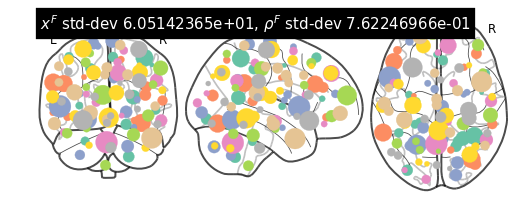

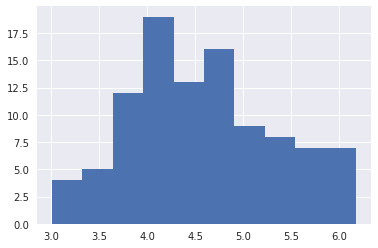

(<nilearn.plotting.displays.OrthoProjector at 0x7ff539ec3198>,
 tensor([[-32.4673, -85.8829,  -9.2772],
         [ 50.0435,  15.9576,  -0.6170],
         [ -1.8502,  35.8324,  12.0115],
         [-18.7613, -36.0507,  43.2545],
         [ 21.4457, -55.6984, -49.5223],
         [ 38.0450, -49.7931,  54.3793],
         [-24.4079, -37.5343, -33.0928],
         [  4.9704,  29.7743,  55.3599],
         [-30.6100,  -6.2628,   4.0920],
         [ 26.0817, -52.3717,  13.0771],
         [ 18.7959, -60.8042, -15.5284],
         [ 45.7934,  -3.8938,  47.0640],
         [-41.3564, -46.4958,  55.6707],
         [ 13.2901, -64.5603,  52.6609],
         [-25.5372,  -7.6867,  34.1521],
         [-42.7934,  40.3610,  -7.5653],
         [ 23.6296,  55.9792,  16.8124],
         [ 38.9042, -79.3162,  15.3844],
         [ 40.2648,  36.8044,  23.9074],
         [-58.4474, -41.3423,  -3.3536],
         [ 27.4660,  22.4733, -11.5036],
         [-46.5733,  28.4046,  27.3773],
         [ 35.0950, -74.2289, -14.1

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=True, blocks_filter=lepping_db.inference_filter(training=True, held_out_tasks=set(['tones', 'response'])))

09/26/2019 11:05:01 [Epoch 1] (11136ms) Posterior free-energy 5.89938176e+08 = KL from prior 6.94083875e+05 - log-likelihood -5.89244160e+08
09/26/2019 11:05:01 Saving checkpoint...
09/26/2019 11:05:12 [Epoch 2] (11051ms) Posterior free-energy 5.72625408e+08 = KL from prior 6.66912125e+05 - log-likelihood -5.71958592e+08
09/26/2019 11:05:23 [Epoch 3] (10843ms) Posterior free-energy 5.60481280e+08 = KL from prior 6.46352875e+05 - log-likelihood -5.59834880e+08
09/26/2019 11:05:34 [Epoch 4] (10821ms) Posterior free-energy 5.49656640e+08 = KL from prior 6.18255062e+05 - log-likelihood -5.49038336e+08
09/26/2019 11:05:45 [Epoch 5] (10833ms) Posterior free-energy 5.41633856e+08 = KL from prior 5.99224312e+05 - log-likelihood -5.41034624e+08
09/26/2019 11:05:56 [Epoch 6] (10774ms) Posterior free-energy 5.34205536e+08 = KL from prior 5.80063500e+05 - log-likelihood -5.33625536e+08
09/26/2019 11:06:06 [Epoch 7] (10772ms) Posterior free-energy 5.29434976e+08 = KL from prior 5.67517875e+05 - log

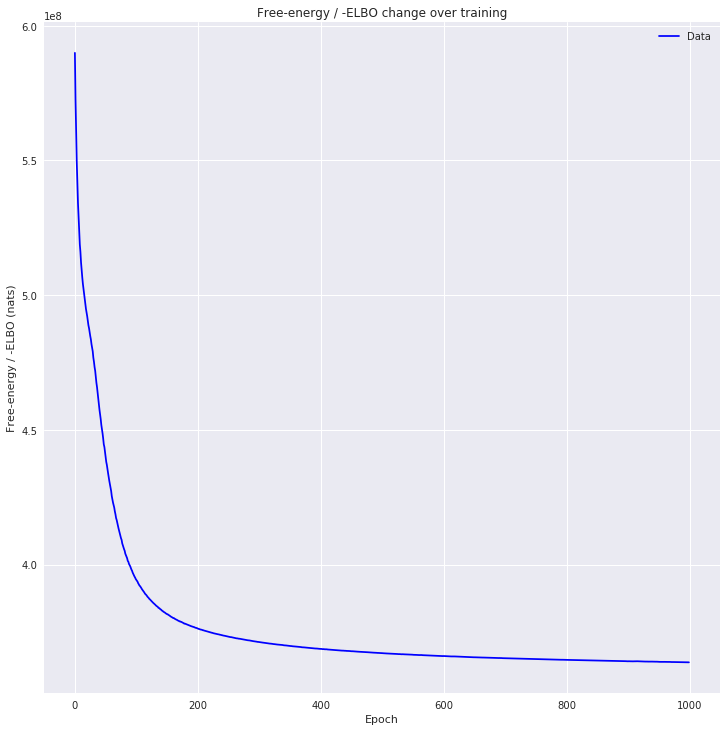

In [9]:
utils.plot_losses(losses)

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False, held_out_tasks=set(['tones', 'response'])))

09/26/2019 14:05:18 [Epoch 1] (3595ms) Posterior free-energy 2.69180960e+08 = KL from prior 2.61256656e+05 - log-likelihood -2.68919712e+08
09/26/2019 14:05:18 Saving checkpoint...
09/26/2019 14:05:22 [Epoch 2] (3575ms) Posterior free-energy 2.66342672e+08 = KL from prior 2.59693203e+05 - log-likelihood -2.66083008e+08
09/26/2019 14:05:26 [Epoch 3] (3581ms) Posterior free-energy 2.63098832e+08 = KL from prior 2.56754016e+05 - log-likelihood -2.62842080e+08
09/26/2019 14:05:29 [Epoch 4] (3571ms) Posterior free-energy 2.61050960e+08 = KL from prior 2.55361422e+05 - log-likelihood -2.60795600e+08
09/26/2019 14:05:33 [Epoch 5] (3557ms) Posterior free-energy 2.53836464e+08 = KL from prior 2.55800344e+05 - log-likelihood -2.53580640e+08
09/26/2019 14:05:36 [Epoch 6] (3565ms) Posterior free-energy 2.50240320e+08 = KL from prior 2.50417375e+05 - log-likelihood -2.49989888e+08
09/26/2019 14:05:40 [Epoch 7] (3564ms) Posterior free-energy 2.46142048e+08 = KL from prior 2.50928016e+05 - log-likeli

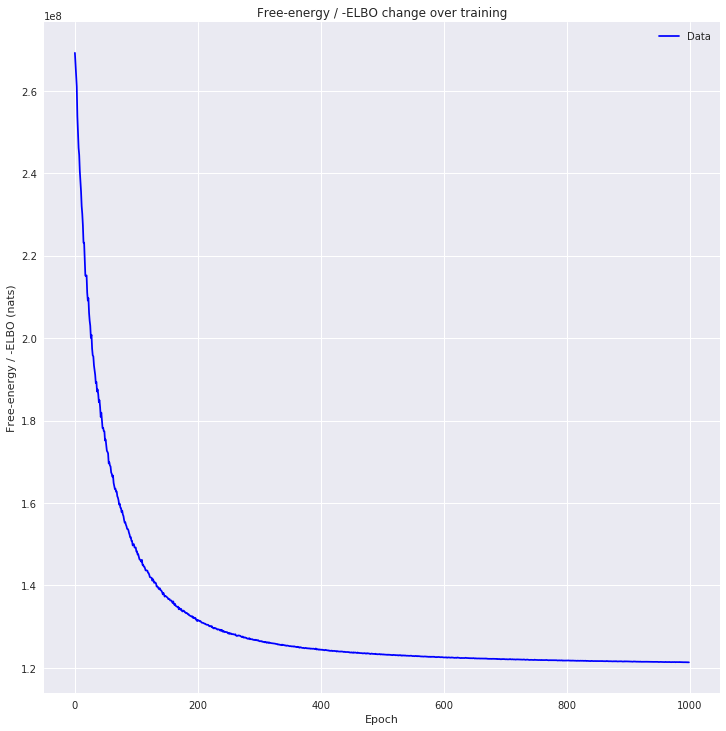

In [11]:
utils.plot_losses(losses)

In [12]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [13]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    elif task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = task.capitalize()
    return task

In [14]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.subject)
    return subject + ', ' + task + ' stimulus'

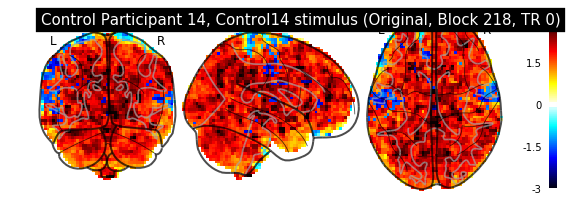

09/26/2019 15:04:51 Reconstruction Error (Frobenius Norm): 5.64507446e+02 out of 7.79277283e+02


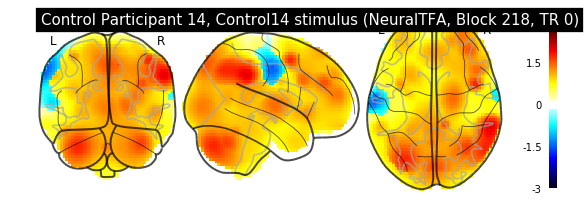

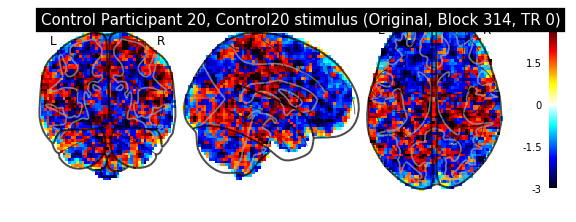

09/26/2019 15:04:54 Reconstruction Error (Frobenius Norm): 7.54609863e+02 out of 9.65112671e+02


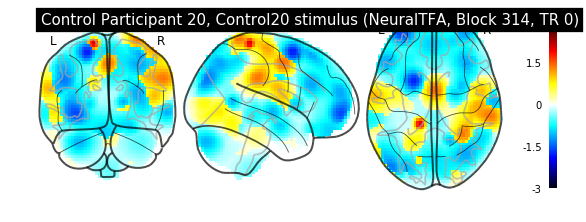

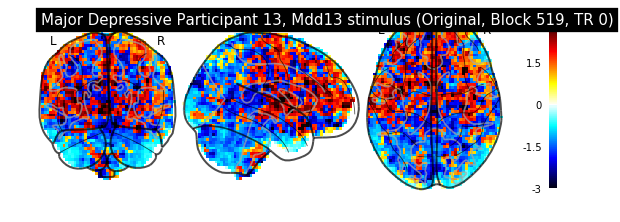

09/26/2019 15:04:57 Reconstruction Error (Frobenius Norm): 6.12060730e+02 out of 6.82306335e+02


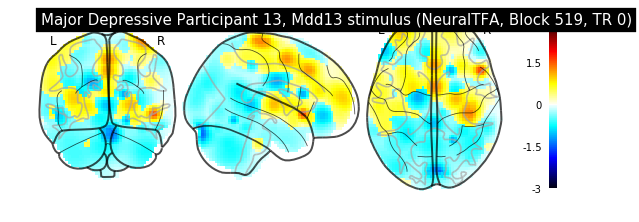

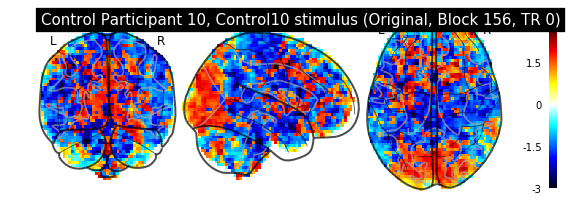

09/26/2019 15:05:00 Reconstruction Error (Frobenius Norm): 5.61995483e+02 out of 6.82230286e+02


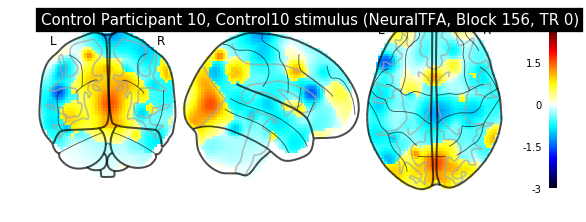

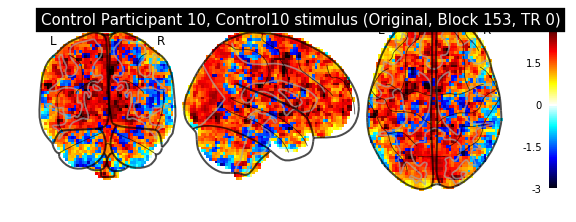

09/26/2019 15:05:03 Reconstruction Error (Frobenius Norm): 5.89229065e+02 out of 7.05619202e+02


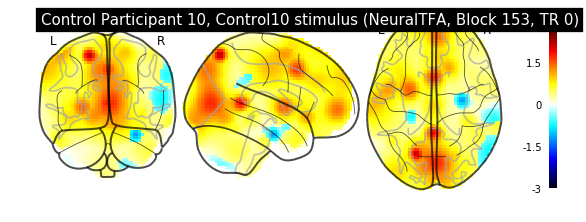

In [15]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


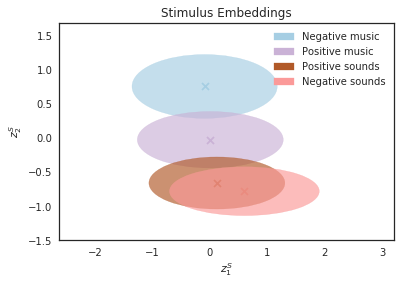

In [25]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired', legend_ordering=[0, 2, 3, 1])

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


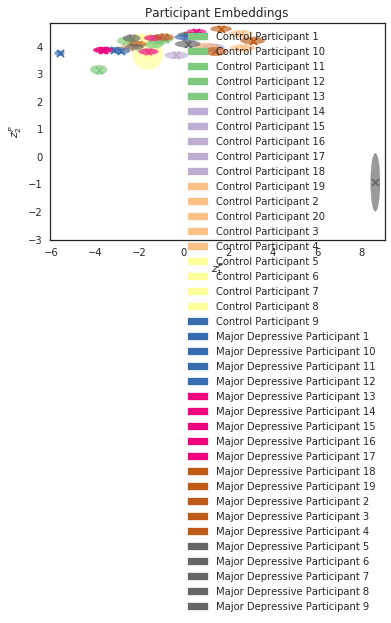

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

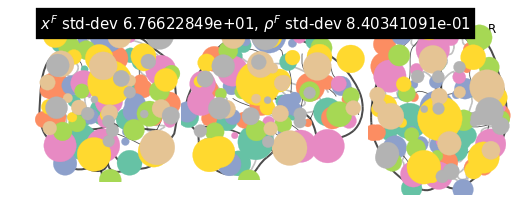

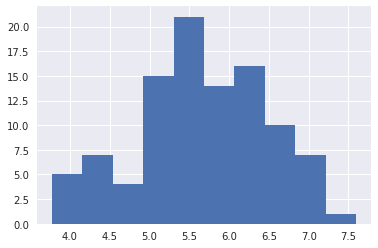

(<nilearn.plotting.displays.OrthoProjector at 0x7ff5043d24e0>,
 tensor([[-2.7865e+01, -1.0488e+02, -7.4857e+00],
         [ 5.0430e+01,  5.2561e+00, -3.0367e+00],
         [-4.7132e+00,  4.1507e+01, -1.8841e+00],
         [-2.4964e+01, -2.8316e+01,  4.2334e+01],
         [ 2.2350e+01, -5.2414e+01, -5.6011e+01],
         [ 2.3472e+01, -5.5980e+01,  5.7069e+01],
         [-3.0072e+01, -3.4087e+01, -3.3495e+01],
         [-8.3610e-02,  2.6898e+01,  7.2490e+01],
         [-3.6063e+01, -6.2469e+00,  9.2775e+00],
         [ 3.1018e+01, -4.9308e+01,  2.3964e+01],
         [ 1.9793e+01, -6.4620e+01, -1.0159e+01],
         [ 3.3880e+01,  1.1383e-01,  5.0697e+01],
         [-5.1471e+01, -4.6914e+01,  6.8455e+01],
         [ 7.5490e+00, -7.7660e+01,  5.3873e+01],
         [-2.5529e+01, -8.8771e+00,  3.1936e+01],
         [-5.6356e+01,  4.6651e+01, -8.1312e+00],
         [ 2.8320e+01,  6.3574e+01,  1.1449e+01],
         [ 3.6919e+01, -8.3127e+01,  2.1808e+01],
         [ 3.3973e+01,  4.1103e+01,  

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

09/26/2019 15:05:42 Average reconstruction error (MSE): 6.66188646e-01
09/26/2019 15:05:42 Average data norm (Euclidean): 9.28131280e-01
09/26/2019 15:05:42 Percent average reconstruction error: 0.276637


(0.6661886456621529, 0.9281312803800874, 0.0027663744519918912)

In [20]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


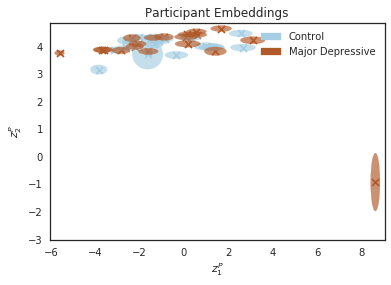

In [23]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None, colormap='Paired')

In [22]:
dtfa.average_reconstruction_error(weighted=False)

09/26/2019 15:06:16 Average reconstruction error (MSE): 5.71713060e+02 +/- 8.78179494e+01
09/26/2019 15:06:16 Average data norm (Euclidean): 7.93378331e+02 +/- 1.40920715e+02
09/26/2019 15:06:16 Percent average reconstruction error: 73.438205 +/- 1.20671715e+01


(array([ 522.23730469,  526.5614624 ,  549.54650879,  534.86480713,
         636.4486084 ,  518.77050781,  532.71661377,  559.20111084,
         536.19281006,  529.99578857,  530.37200928,  533.52661133,
         517.92724609,  530.98059082,  548.51733398,  538.1708374 ,
         588.98840332,  577.31958008,  584.25286865,  588.65203857,
         604.25964355,  617.28131104,  588.73217773,  645.30059814,
         600.68115234,  583.70635986,  598.02325439,  644.62322998,
         571.97802734,  640.78942871,  581.69482422,  579.28363037,
         543.51617432,  502.77612305,  534.56054688,  557.58154297,
         484.23101807,  521.27960205,  534.12652588,  513.4163208 ,
         571.28210449,  559.09832764,  530.04412842,  545.7175293 ,
         550.41259766,  515.31915283,  616.68487549,  513.29168701,
         528.80389404,  518.79766846,  493.76745605,  513.98822021,
         515.52838135,  501.03277588,  519.58447266,  502.58831787,
         584.44445801,  535.25415039,  533.20501